In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("data.csv") # ROTATION IN RADS
trial_schedule = pd.read_csv("tgt.csv")

df.head()

,Trial,Mouse X,Mouse Y,Cursor X,Cursor Y,Rotation
0,0,3.0,-1.0,2.879037,-1.308107,-0.10472
1,0,3.0,-1.0,2.879037,-1.308107,-0.10472
2,0,3.0,-1.0,2.879037,-1.308107,-0.10472
3,0,3.0,-1.0,2.879037,-1.308107,-0.10472
4,0,3.0,-1.0,2.879037,-1.308107,-0.10472


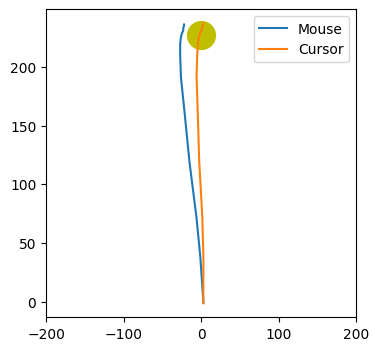

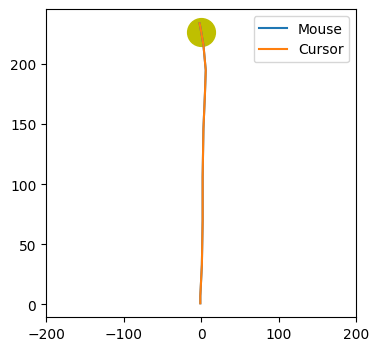

In [60]:
import matplotlib.pyplot as plt

target_loc_x, target_loc_y = (0, 3.78*60)

trial_min = 0
trial_max = 1
df_head = df[df["Trial"].between(trial_min, trial_max)]


for trial, trial_data in df_head.groupby("Trial"):
    plt.figure(figsize=(4, 4))
    plt.plot(trial_data["Mouse X"], trial_data["Mouse Y"], label=f"Mouse")
    plt.plot(trial_data["Cursor X"], trial_data["Cursor Y"], label=f"Cursor")
    plt.scatter(target_loc_x, target_loc_y, s=400, color='y')

    plt.xlim([-200, 200])
    plt.legend()
    plt.show()



In [61]:
# Compute start and end positions for each trial
tError = df.groupby("Trial")[["Cursor X", "Cursor Y"]].agg(["first", "last"])

# Compute displacement
tError["Delta X"] = tError[("Cursor X", "last")] - tError[("Cursor X", "first")]
tError["Delta Y"] = tError[("Cursor Y", "last")] - tError[("Cursor Y", "first")]

tError["Angle Radians"] = -np.arctan2(tError["Delta X"], tError["Delta Y"])  # atan2(x, y)
tError["Angle Degrees"] = np.degrees(tError["Angle Radians"])

tError["Rotation"] = np.rad2deg(df.groupby("Trial")["Rotation"].first())

tError.head()

Cursor X             Cursor Y                Delta X     Delta Y  \
          first       last     first        last                          
Trial                                                                     
0      2.879037   2.789236 -1.308107  237.006793  -0.089802  238.314901   
1     -1.000000  -2.000000  1.000000  234.000000  -1.000000  233.000000   
2      0.000000 -14.000000  2.000000  225.000000 -14.000000  223.000000   
3     -2.999543  19.912482 -0.052357  234.383218  22.912025  234.435576   
4      2.000000   6.000000 -2.000000  249.000000   4.000000  251.000000   

      Angle Radians Angle Degrees Rotation  
                                            
Trial                                       
0          0.000377      0.021590     -6.0  
1          0.004292      0.245903      0.0  
2          0.062698      3.592330      0.0  
3         -0.097423     -5.581945      1.0  
4         -0.015935     -0.913003      0.0

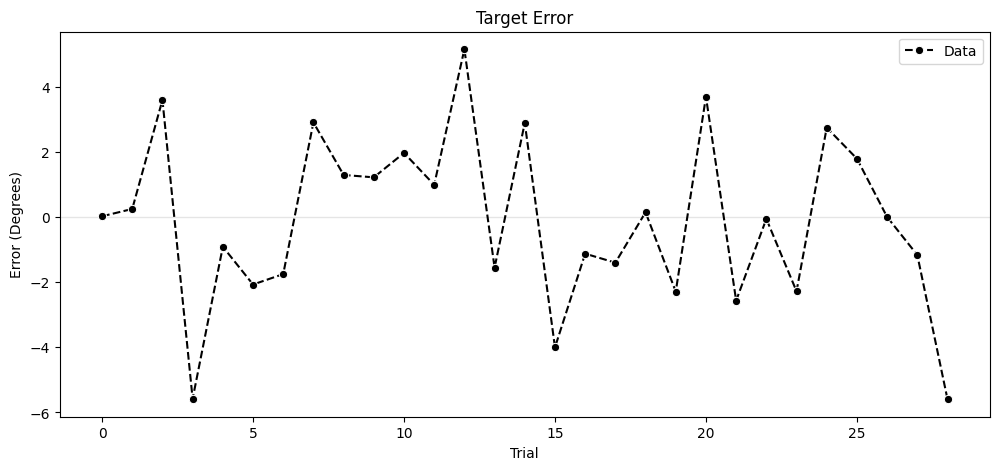

In [62]:
plt.figure(figsize=(12,5))
# plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
# plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline")
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

sns.lineplot(
    data=tError,
    x="Trial",
    y="Angle Degrees",
    label='Data',
    ls='--',
    marker='o',
    color='k'
)
#plt.xticks(df_grouped.index, rotation=0);
plt.ylabel("Error (Degrees)")
plt.title("Target Error")
plt.legend(frameon=True)
plt.show()

In [63]:
# Run once please
start_positions = df.groupby("Trial")[["Cursor X", "Cursor Y"]].first().rename(columns={"Cursor X": "Cursor X_Start", "Cursor Y": "Cursor Y_Start"})
df = df.merge(start_positions, on="Trial")


In [64]:
df["Distance"] = np.sqrt((df["Cursor X"] - df["Cursor X_Start"])**2 + (df["Cursor Y"] - df["Cursor Y_Start"])**2)

hError = df[df["Distance"] > 40].groupby("Trial").first().reset_index()
hError = hError[["Trial", "Cursor X", "Cursor Y", "Distance"]]
hError.head()

,Trial,Cursor X,Cursor Y,Distance
0,0,1.558918,72.232747,73.552702
1,1,2.000000,70.000000,69.065187
2,2,0.000000,59.000000,57.000000
3,3,2.847532,66.059758,66.370174
4,4,2.000000,47.000000,49.000000


In [65]:
hError[['Start Pos X', "Start Pos Y"]] = start_positions

hError["Delta X"] = hError["Cursor X"] - hError["Start Pos X"]
hError["Delta Y"] = hError["Cursor Y"] - hError["Start Pos Y"]

hError["Angle Radians"] = -np.arctan2(hError["Delta X"], hError["Delta Y"])  # atan2(x, y)
hError["Angle Degrees"] = np.degrees(hError["Angle Radians"])

hError["Rotation"] = np.rad2deg(df.groupby("Trial")["Rotation"].first())

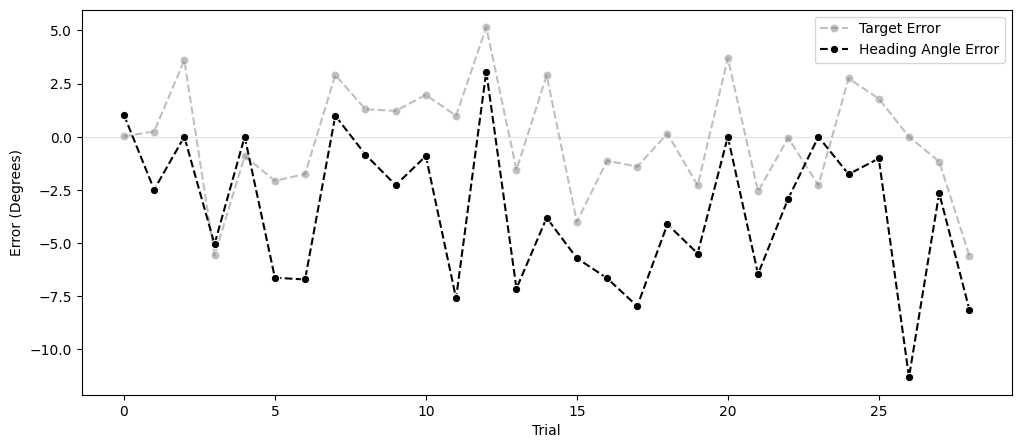

In [67]:
plt.figure(figsize=(12,5))
# plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
# plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline")
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

sns.lineplot(
    data=tError,
    x="Trial",
    y="Angle Degrees",
    label='Target Error',
    ls='--',
    marker='o',
    color='gray',
    alpha=0.5
)

sns.lineplot(
    data=hError,
    x="Trial",
    y="Angle Degrees",
    label='Heading Angle Error',
    ls='--',
    marker='o',
    color='k'
)

#plt.xticks(df_grouped.index, rotation=0);
plt.ylabel("Error (Degrees)")
# plt.title("Target Error")
plt.legend(frameon=True)
plt.show()

<Axes: xlabel='Trial'>

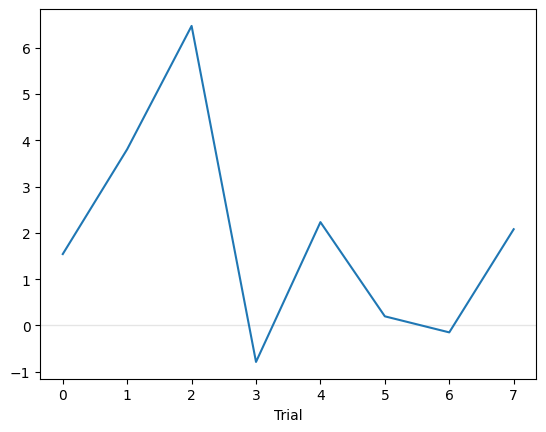

In [42]:
diff = tError["Angle Degrees"] - hError["Angle Degrees"]

# plt.axvspan(0, n_baseline, color="gray", alpha=0.1, label="Baseline")
# plt.axvspan(n_baseline + n_exposure, len(df.groupby("Trial")), color="gray", alpha=0.1, label="Baseline");
plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.1)

diff.plot()